![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción producción de toneladas de café diaria**

**Series de tiempo** <br>

Profesor: Wilson Sandoval Rodriguez <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

![Tarea](https://file.notion.so/f/f/f34f306e-d9b5-494b-b818-5da09ff1677a/8ec70526-7346-4038-af12-aecbfc968fd2/image.png?table=block&id=111552c0-2d01-80ed-b486-de7d3fff6db1&spaceId=f34f306e-d9b5-494b-b818-5da09ff1677a&expirationTimestamp=1727827200000&signature=FRTD8cTXDHdItIfpAcorwW5HuawMCywhFPWqJVqDR1o&downloadName=image.png)

# Preliminares

Librerias y modulos personalizados a utilizar:


La data a utilizar esta en el siguiente enlace [Cafe.xlsx](https://github.com/Wilsonsr/Series-de-Tiempo/blob/main/bases/cafe.xlsx)

In [1]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

/home/danielcardenas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Cargar el DataSet Cafe.xlsx

url = ("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/bases/cafe.xlsx") # Url del archivo

df = cargar_dataset(url,sheet_name='Hoja1') # Modulo para cargue de archivos .csv y .xlsx

df.head(10) # Mostrar la información del df

Archivo Excel cargado exitosamente: 295 filas, 2 columnas


,fecha,Toneladas
0,2000-01-01,658.0
1,2000-02-01,740.0
2,2000-03-01,592.0
3,2000-04-01,1055.0
4,2000-05-01,1114.0
5,2000-06-01,1092.0
6,2000-07-01,811.0
7,2000-08-01,436.0
8,2000-09-01,501.0
9,2000-10-01,940.0


In [3]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      295 non-null    datetime64[ns]
 1   Toneladas  295 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


In [4]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['fecha'] # Definir la columna fecha como index
df.drop(columns=['fecha'],inplace=True) # Eliminar la columna fecha
df

,Toneladas
fecha,
2000-01-01,658.000000
2000-02-01,740.000000
2000-03-01,592.000000
2000-04-01,1055.000000
2000-05-01,1114.000000
...,...
2024-03-01,865.532563
2024-04-01,742.000000
2024-05-01,1120.000000


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

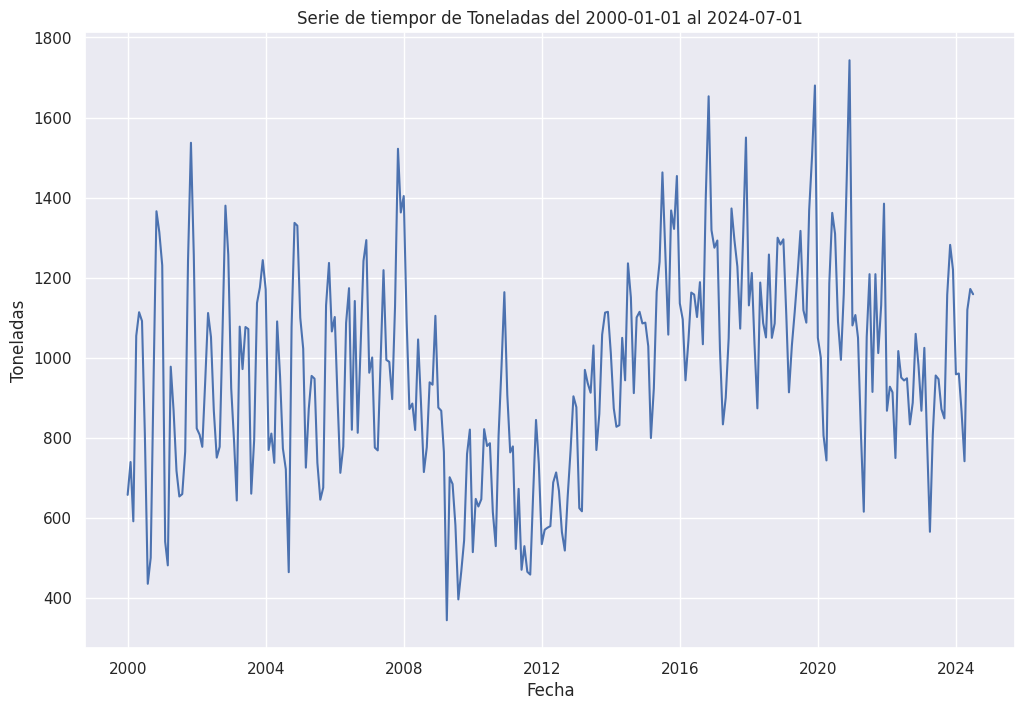

In [5]:
serie_de_tiempo(df,'Toneladas')

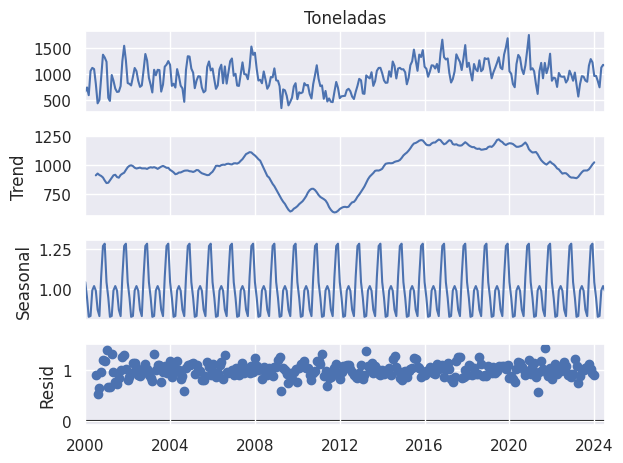

In [33]:
Serie_decompuesta = seasonal_decompose (df['Toneladas'],model = 'multiplicative')
grafico1 = Serie_decompuesta.plot()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins 

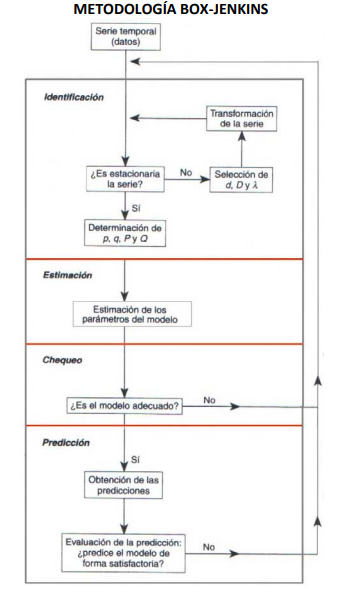


## Identificación

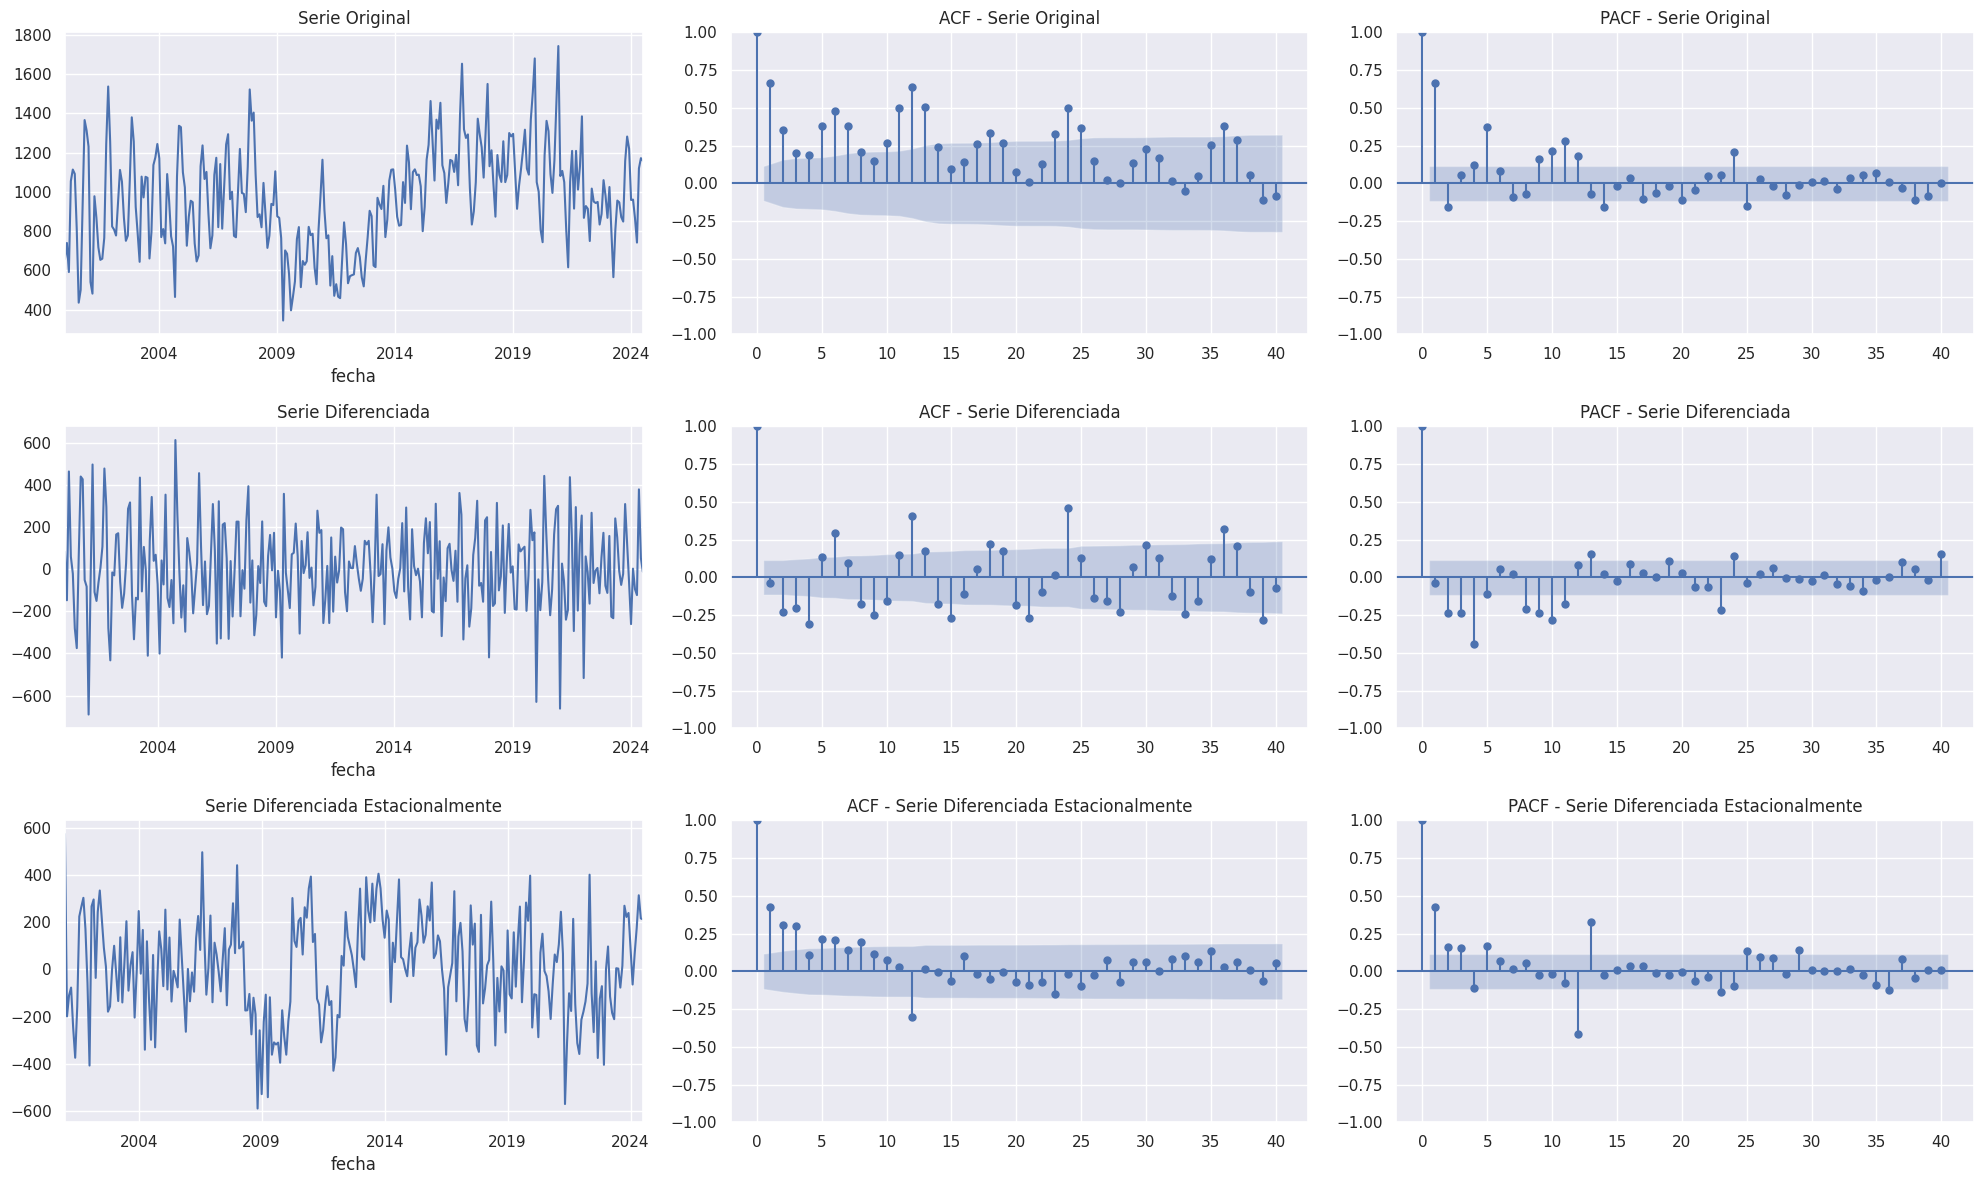

In [7]:
plot_time_series_analysis(df,'Toneladas')

In [8]:
# prueba de Dickey Fuller para las series

from statsmodels.tsa.stattools import adfuller

SerieOriginal_adf = adfuller(df['Toneladas'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.7459268812924058
p-value: 0.407618286387418
Critical Values:
	1%: -3.4538376962008495
	5%: -2.8718811911083093
	10%: -2.5722803076202174


In [9]:
SerieDiferenciada_adf = adfuller(df['Toneladas'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -6.352779432247492
p-value: 2.5863021436763534e-08
Critical Values:
	1%: -3.4538376962008495
	5%: -2.8718811911083093
	10%: -2.5722803076202174


In [10]:
SerieDiferenciadaEst_adf = adfuller(df['Toneladas'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.8483194170255364
p-value: 0.00244988216053333
Critical Values:
	1%: -3.4548039258751206
	5%: -2.872304928618605
	10%: -2.5725063100137175


## Suavisasado Exponencial


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial simple'}, xlabel='fecha'>

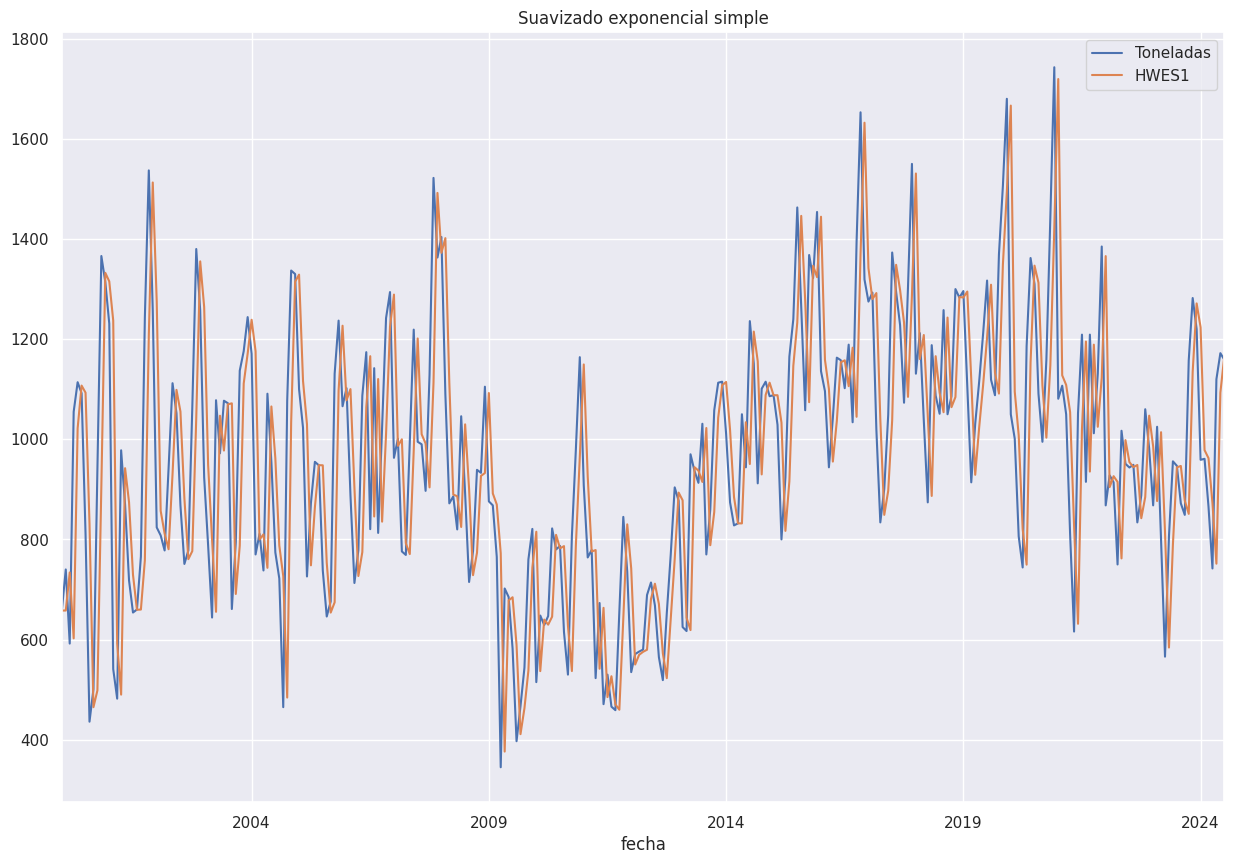

In [31]:
df_s = df.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['Toneladas']).fit(optimized=True,use_brute=True).fittedvalues
df_s[['Toneladas','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='fecha'>

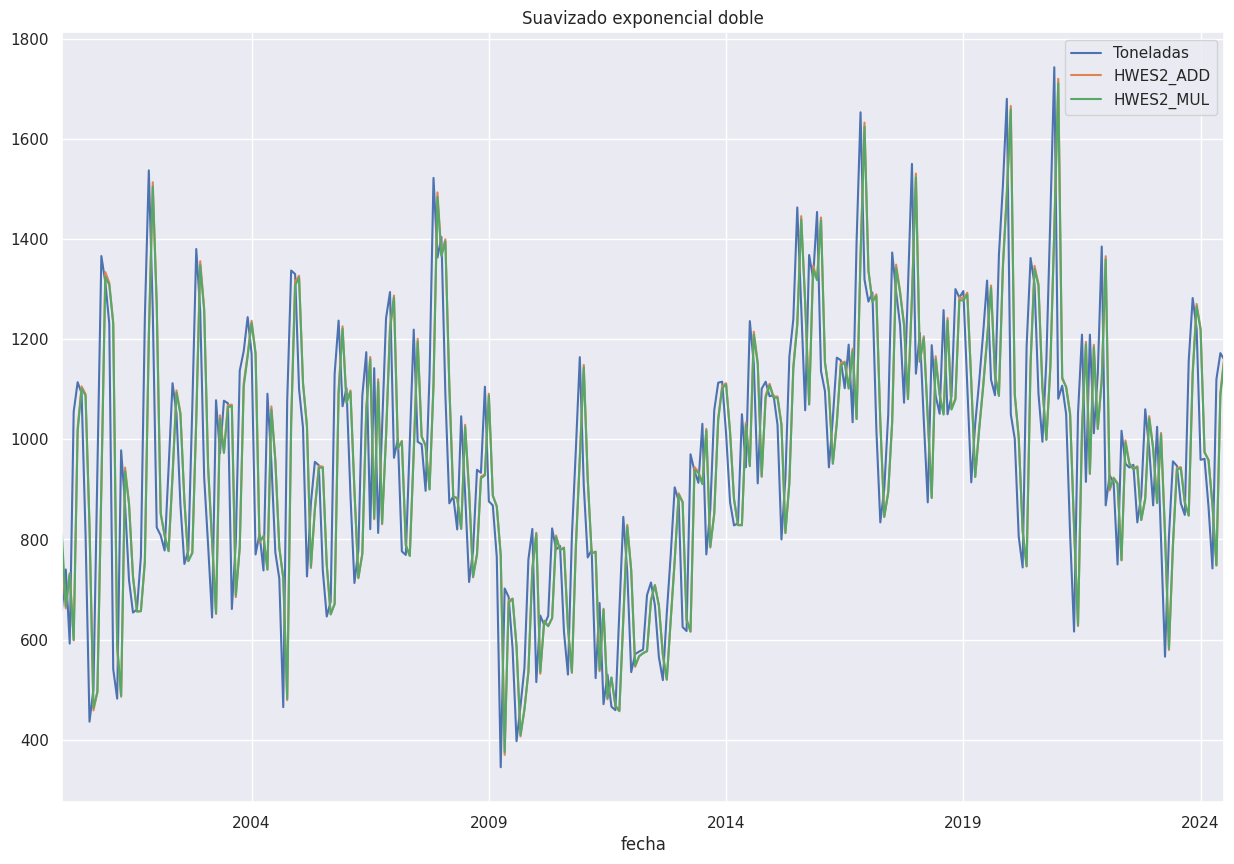

In [34]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['Toneladas'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['Toneladas'],trend='mul').fit().fittedvalues
df_s[['Toneladas', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='fecha'>

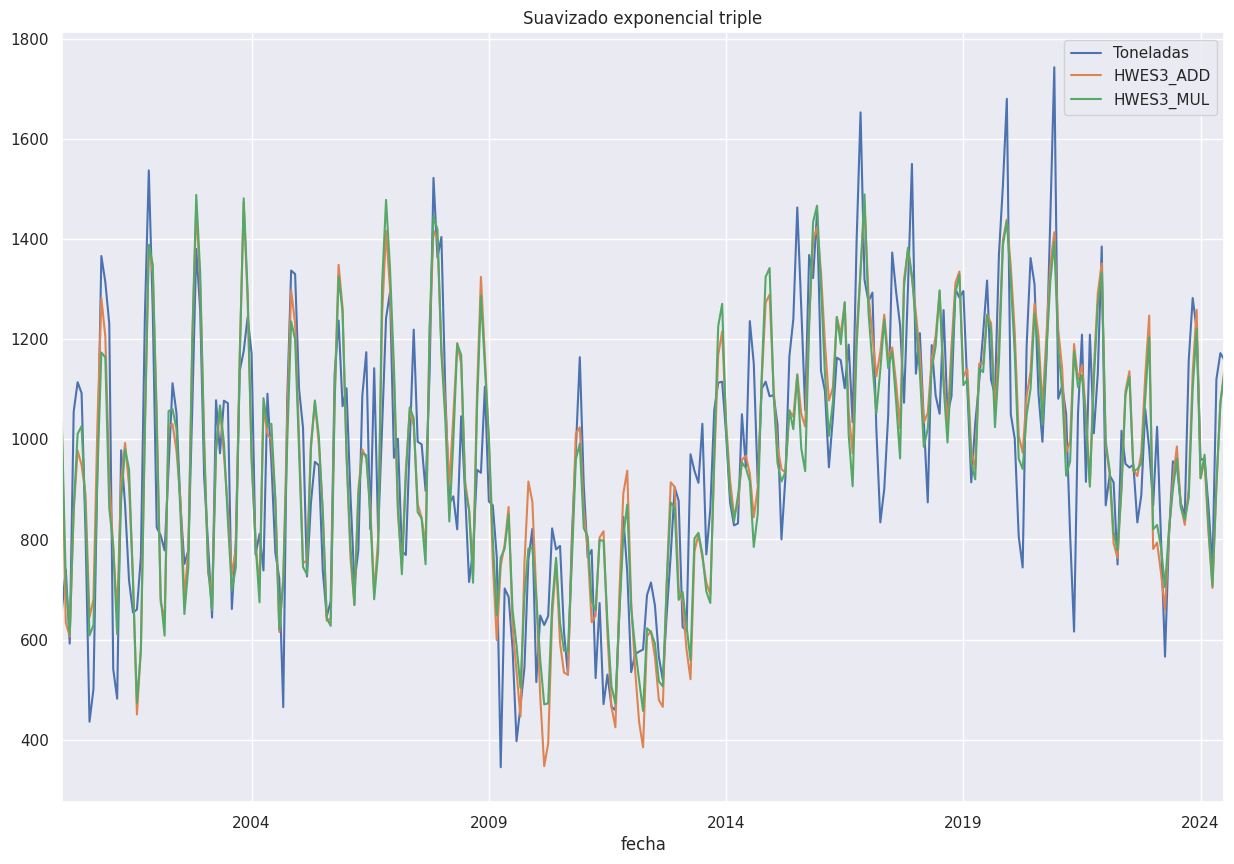

In [36]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['Toneladas'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['Toneladas'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['Toneladas', 'HWES3_ADD','HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [61]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:283]
Prueba_df_s= df_s[283:]

display(Prueba_df_s,Entrenamiento_df_s)

,Toneladas,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
fecha,,,,,,
2023-08-01,872.000000,946.768659,944.304062,942.476950,866.941573,864.159999
2023-09-01,849.000000,877.474597,874.239940,873.684386,829.172468,839.349850
2023-10-01,1157.458473,851.084923,848.186570,847.325186,900.626460,883.383253
2023-11-01,1282.106637,1135.025657,1135.070344,1129.292268,1133.090090,1100.656392
2023-12-01,1220.000000,1271.337298,1270.259484,1265.303392,1258.579599,1220.978361
2024-01-01,959.000000,1223.758941,1220.912092,1218.387087,921.895621,922.181973
2024-02-01,961.000000,978.385775,973.545592,974.586140,957.784801,969.225801
2024-03-01,865.532563,962.272995,959.399073,958.043058,812.077775,824.957835
2024-04-01,742.000000,872.615943,869.171647,868.914324,702.984947,706.707706


,Toneladas,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
fecha,,,,,,
2000-01-01,658.000000,658.000000,766.528474,812.145455,1026.694957,1033.620866
2000-02-01,740.000000,658.000000,662.327741,666.332674,634.005039,718.381172
2000-03-01,592.000000,733.995921,732.293900,730.768671,606.219017,610.062188
2000-04-01,1055.000000,602.397008,598.367819,599.498852,857.701232,859.183647
2000-05-01,1114.000000,1021.860195,1022.843606,1015.488622,977.450577,1010.981304
...,...,...,...,...,...,...
2023-03-01,799.000000,1014.136178,1012.752731,1009.265455,732.088002,783.239951
2023-04-01,565.867207,814.752373,810.375690,811.510733,659.894864,704.986618
2023-05-01,806.195506,584.090697,579.170205,582.004429,811.981930,819.278643


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


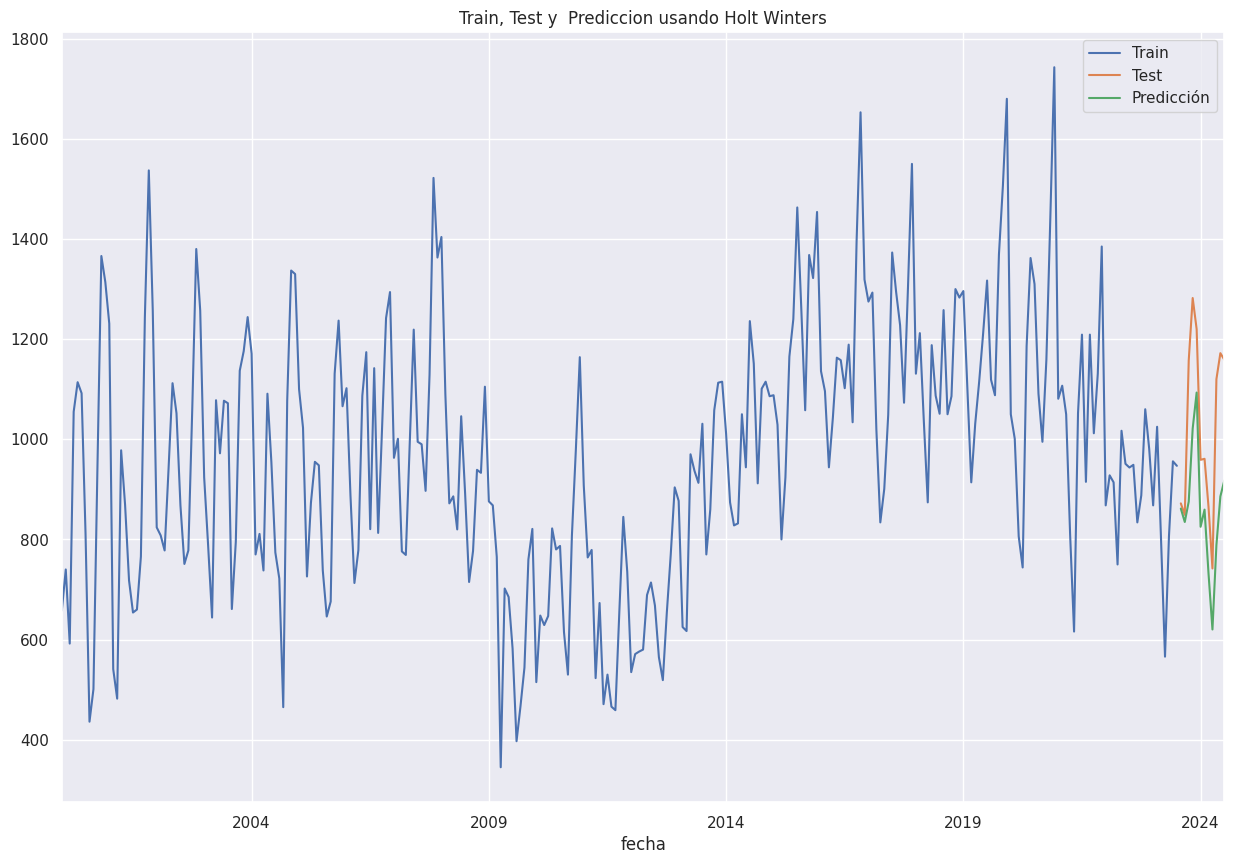

In [62]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Toneladas"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
Entrenamiento_df_s["Toneladas"].plot(legend=True,label="Train")
Prueba_df_s["Toneladas"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='fecha'>

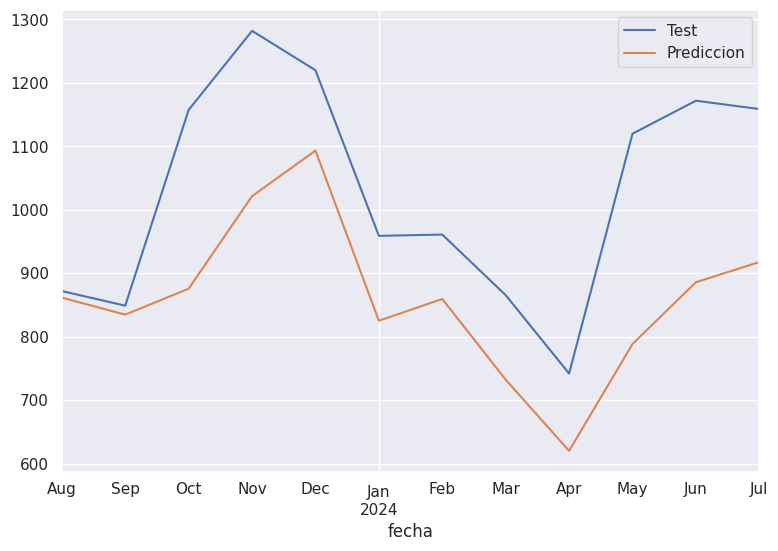

In [63]:
Prueba_df_s['Toneladas'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [73]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["Toneladas"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['Toneladas'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['Toneladas'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['Toneladas'], test_predictions)*100:.2f}%")

MAE 170.22
MSE: 39527.28
RMSE: 198.81
MAPE: 15.75%
